# EDA --> Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the process of analyzing and summarizing a dataset to understand its key characteristics, patterns, and relationships.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Problem Statement

# Problem Statement: Strategic Insights to Improve Netflix's Content Acquisition and User Retention

Analyze Netflix’s content to identify which types of content (based on genre, country, and format) are most dominant and how their distribution has changed over time. 

## 2. Data Collection

In [35]:
df=pd.read_csv(r"C:\Users\Dell\Downloads\archive (5)\netflix_titles_2021.csv")

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.shape

(8807, 12)

# 3. Data cleaning

In [11]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
percentage=round((df.isnull().sum()/len(df))*100)
percentage

show_id          0.0
type             0.0
title            0.0
director        30.0
cast             9.0
country          9.0
date_added       0.0
release_year     0.0
rating           0.0
duration         0.0
listed_in        0.0
description      0.0
dtype: float64

In [15]:
df['director'].dtype # the column director has 30% of missing values so i am replacing them with mode 

dtype('O')

In [27]:
m=df['director'].mode()[0]  # finding mode 
m

'Rajiv Chilaka'

In [39]:
df['director'].fillna(m,inplace=True)  # replacing missing values with mode
df['director'].isnull().sum()

0

In [43]:
df.dropna(subset=['cast','country'],inplace=True)  # the columns country and cast are having 9% of missing values so lets drop those rows
df[['cast','country']].isnull().sum() 

cast       0
country    0
dtype: int64

In [47]:
percentage=round((df.isnull().sum()/len(df))*100)  # finally all missing values were handeled
percentage

show_id         0.0
type            0.0
title           0.0
director        0.0
cast            0.0
country         0.0
date_added      0.0
release_year    0.0
rating          0.0
duration        0.0
listed_in       0.0
description     0.0
dtype: float64

### Number of Netflix Titles Released per Year

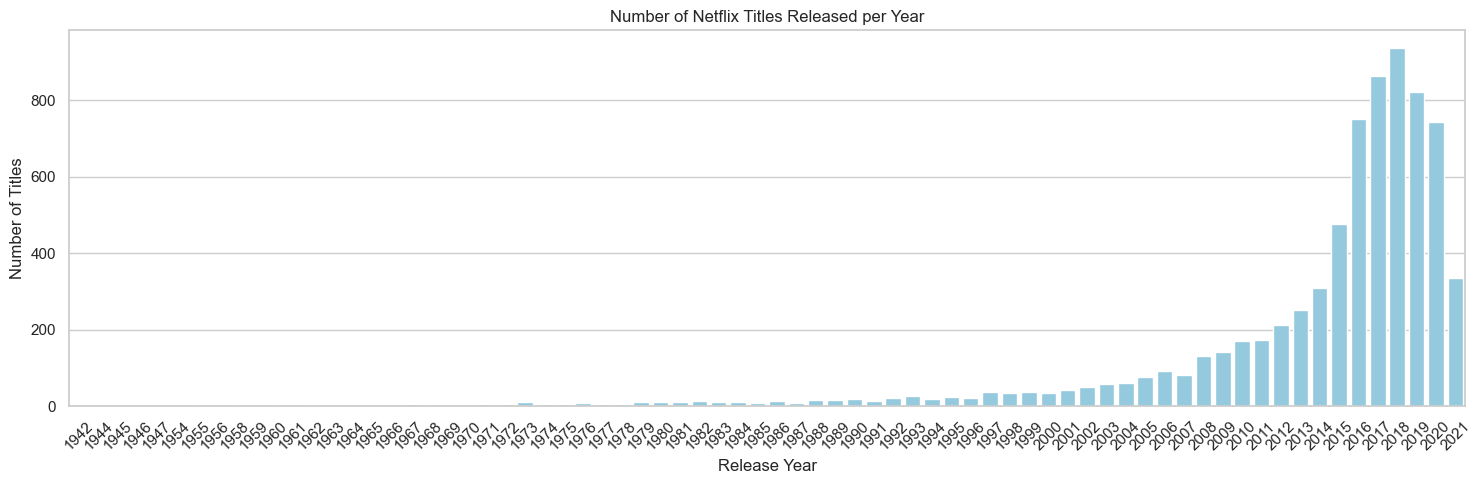

In [55]:
df.dropna(subset=['release_year', 'type', 'listed_in', 'country'], inplace=True)
sns.set(style="whitegrid")

# 1. Titles added per year
titles_per_year = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(15, 5))
sns.barplot(x=titles_per_year.index, y=titles_per_year.values, color='skyblue')
plt.title("Number of Netflix Titles Released per Year")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Movies vs TV Shows Released Over the Years

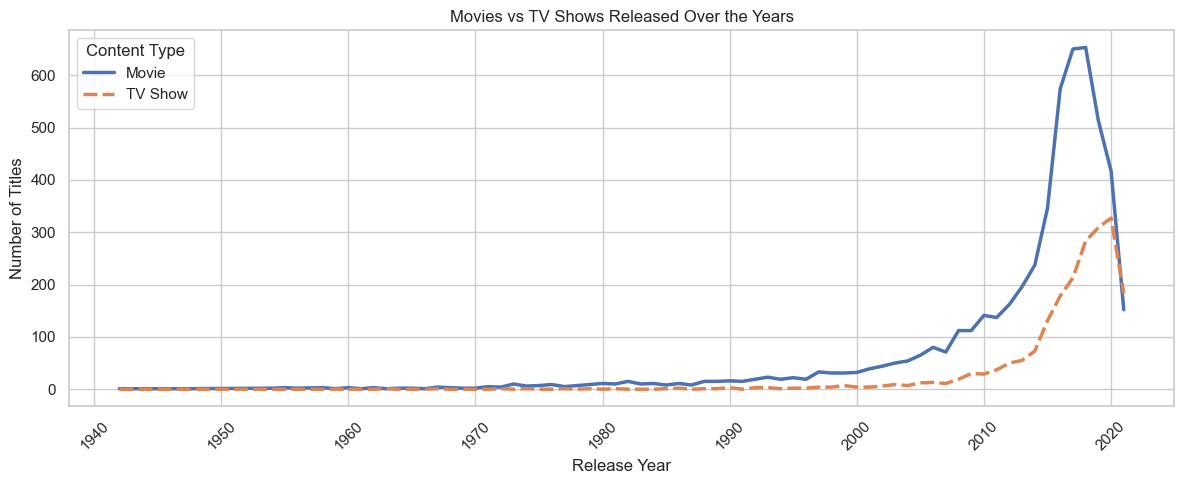

In [57]:
type_year_counts = df.groupby(['release_year', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(12, 5))
sns.lineplot(data=type_year_counts, linewidth=2.5)
plt.title("Movies vs TV Shows Released Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

### Top 10 Countries by Number of Netflix Titles

This code creates a horizontal bar chart showing the Top 10 countries that have produced the most Netflix content—so Netflix can understand where their content is coming from the most.

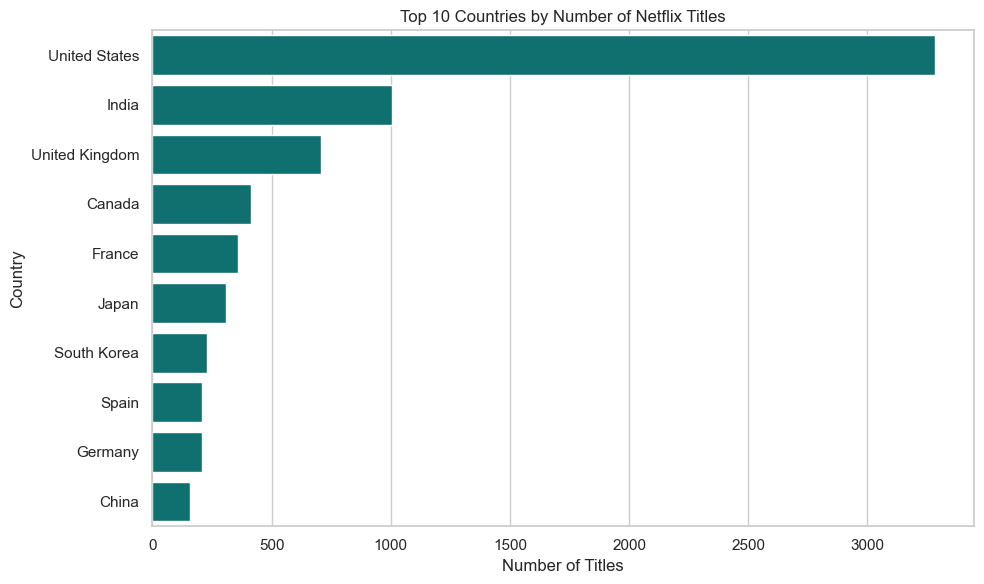

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, color='teal')  # Removed palette
plt.title("Top 10 Countries by Number of Netflix Titles")
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.tight_layout()
plt.show()

### Top 10 Netflix Genres 

### Genres are categories or classifications that describe the style, theme, or content of a movie or TV show. They help viewers know what kind of content to expect.



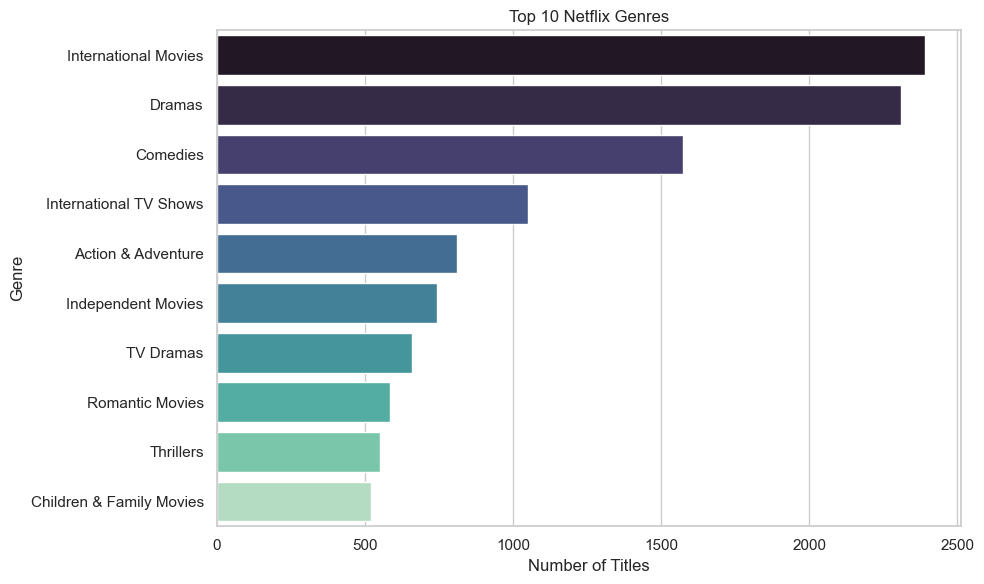

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='mako', dodge=False, legend=False)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Number of Titles")
plt.ylabel("Genre")
plt.tight_layout()
plt.show()


### Top 10 Genres Split by Type (Movies vs TV Shows

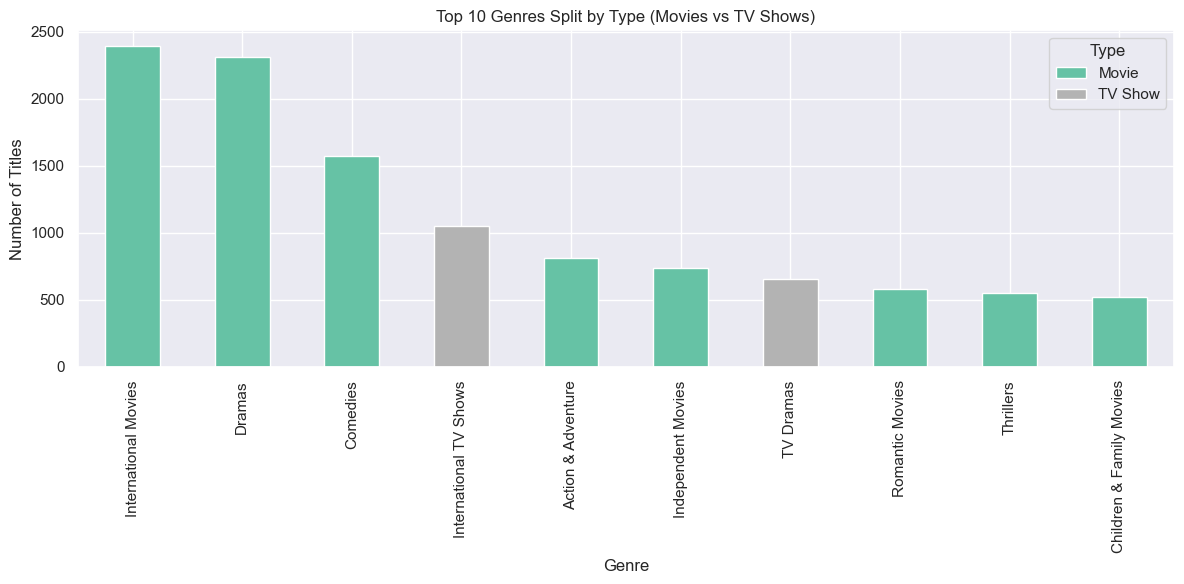

In [112]:
df_genre_type = df[['type', 'listed_in']].copy()
df_genre_type['listed_in'] = df_genre_type['listed_in'].str.split(', ')
df_genre_type = df_genre_type.explode('listed_in')
genre_type_counts = df_genre_type.groupby(['listed_in', 'type']).size().unstack().fillna(0)
top_genres = genre_type_counts.sum(axis=1).sort_values(ascending=False).head(10)
genre_type_counts = genre_type_counts.loc[top_genres.index]

genre_type_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set2')
plt.title("Top 10 Genres Split by Type (Movies vs TV Shows)")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.legend(title="Type")
plt.tight_layout()
plt.show()


### Top 10 Netflix Genres vs years 

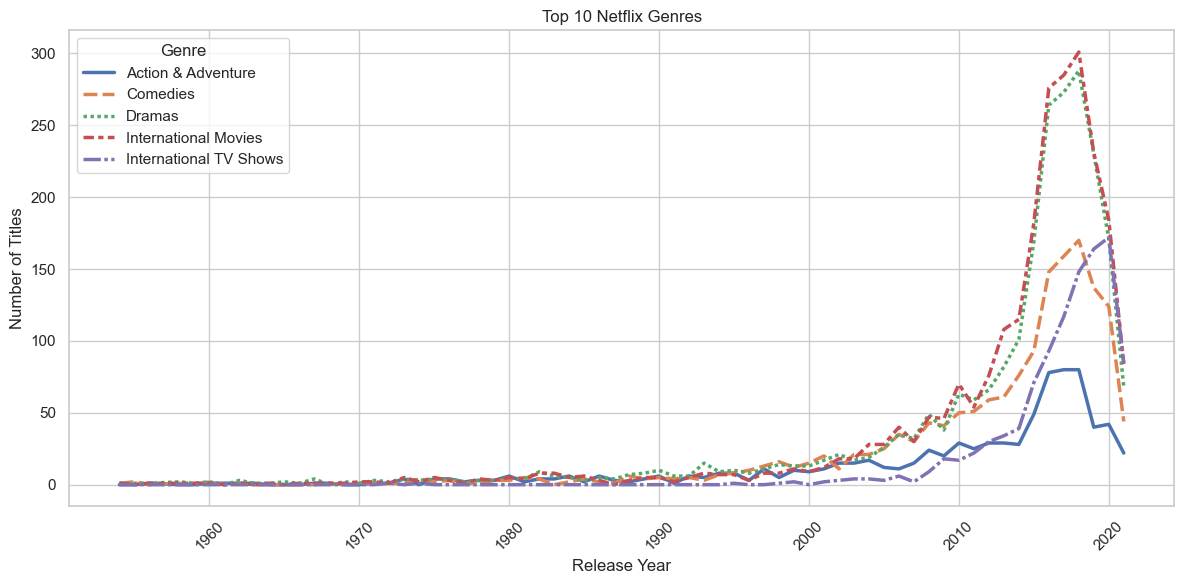

In [81]:
top_5_genres = genre_data.value_counts().head(5).index
df_genres_year = df[['release_year', 'listed_in']].copy()
df_genres_year['listed_in'] = df_genres_year['listed_in'].str.split(', ')
df_genres_year = df_genres_year.explode('listed_in')
df_genres_year = df_genres_year[df_genres_year['listed_in'].isin(top_5_genres)]
genre_trends = df_genres_year.groupby(['release_year', 'listed_in']).size().unstack().fillna(0)
plt.figure(figsize=(12, 6))
sns.lineplot(data=genre_trends, linewidth=2.5)
plt.title("Top 10 Netflix Genres")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.legend(title="Genre")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Distribution of Movies and TV Shows on Netflix 

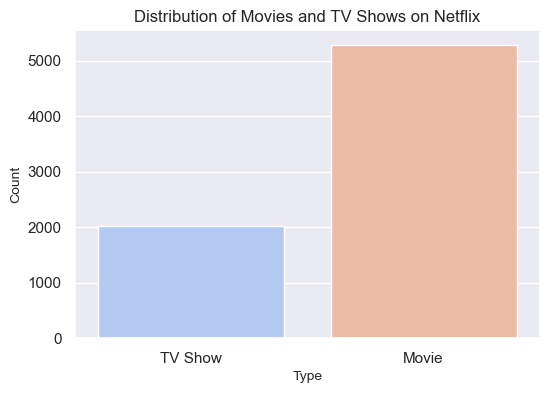

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("darkgrid")
# Figure 1: Count of Movies vs. TV Shows
# This is an example of univariate analysis
plt.figure(figsize=(6, 4))
sns.countplot(x=df["type"], hue=df["type"], palette="coolwarm", legend=False)
plt.title("Distribution of Movies and TV Shows on Netflix", fontsize=12)
plt.xlabel("Type", fontsize=10) 
plt.ylabel("Count", fontsize=10) 
plt.show()



### Number of Seasons of TV Shows by Country

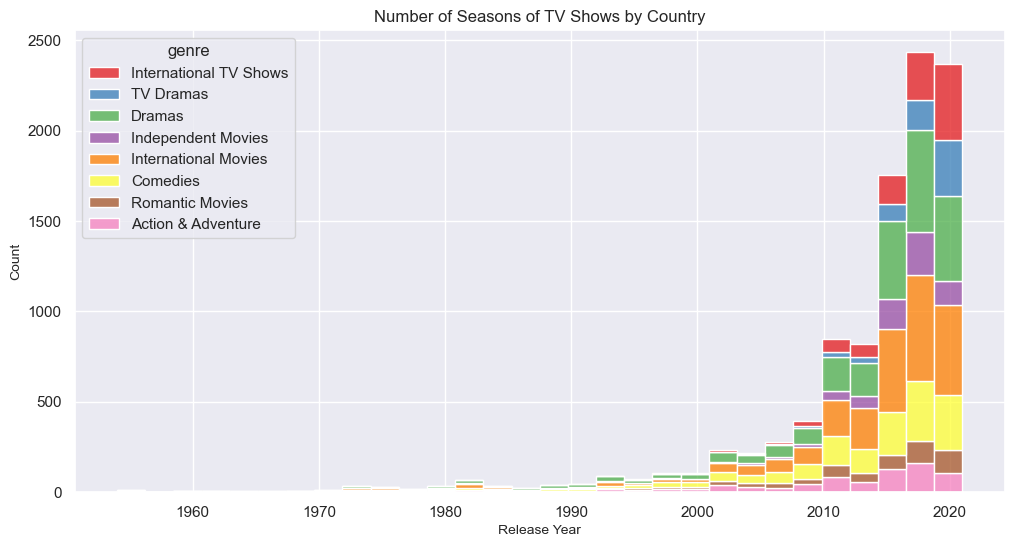

In [103]:
df_exploded = df.assign(genre=df["listed_in"].str.split(", ")).explode("genre")
plt.figure(figsize=(12, 6))
top_genres = df_exploded["genre"].value_counts().head(8).index
sns.histplot(data=df_exploded[df_exploded["genre"].isin(top_genres)], x="release_year", hue="genre", multiple="stack",palette="Set1", bins=30)
plt.title("Number of Seasons of TV Shows by Country", fontsize=12)
plt.xlabel("Release Year", fontsize=10)
plt.ylabel("Count", fontsize=10) 
plt.show()


In [122]:
!pip install squarify


### Top 10 Most Frequent Directors on Netflix (Treemap)

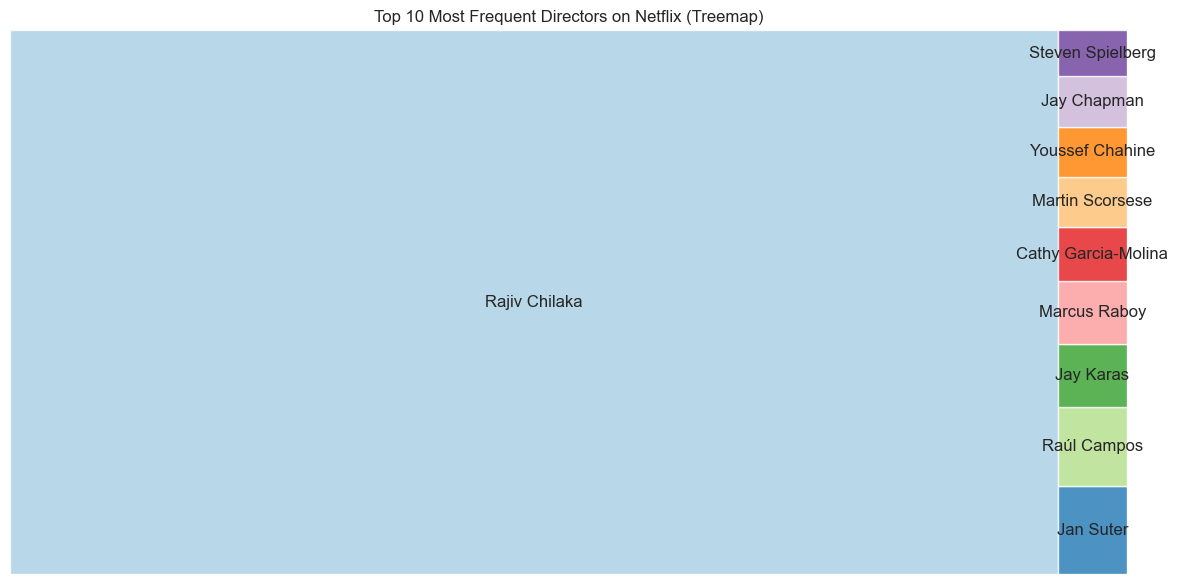

In [124]:
import matplotlib.pyplot as plt
import squarify

# Get and clean director data
director_data = df['director'].dropna().str.split(', ')
director_data = director_data.explode()
top_directors = director_data.value_counts().head(10)

# Plot the treemap
plt.figure(figsize=(12, 6))
squarify.plot(sizes=top_directors.values, 
              label=top_directors.index, 
              color=plt.cm.Paired.colors, 
              alpha=0.8)
plt.title("Top 10 Most Frequent Directors on Netflix (Treemap)")
plt.axis('off')
plt.tight_layout()
plt.show()


